NAME- DEVLINA PAL

LETSGROWMORE INTERNSHIP INTERMEDIATE LEVEL TASK -2

1. IMPORT LIBRARY

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn import tree

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

2. LOAD DATA

In [59]:
data=pd.read_csv("Iris.csv")

3. UNDERSTANDING DATA

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [60]:
data.drop('Id',axis=1,inplace = True)

In [7]:
data.shape

(150, 6)

In [8]:
data.columns.values

array(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'], dtype=object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


4. PREPROCESSING DATA

In [11]:
data = data.drop(['Id'], axis =1)

In [12]:
#label encode
data=data.replace(to_replace={'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
data['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

DATA VISUALIZATION

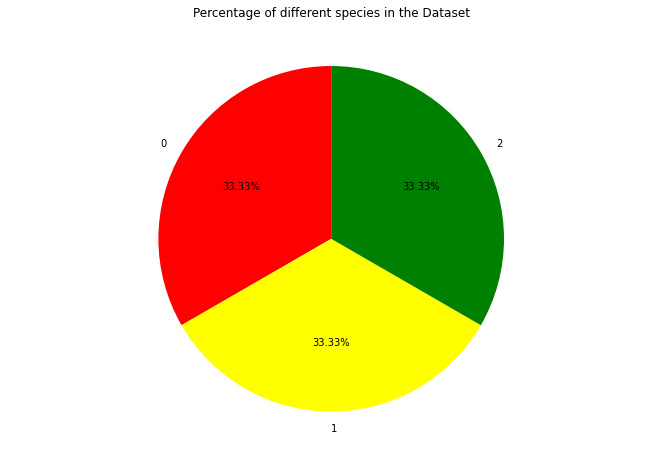

In [18]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['red','yellow','green']
sp = data['Species'].unique()
ct = data['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Percentage of different species in the Dataset')
plt.show()

Text(0.5, 1.0, 'Species vs Sepal Length')

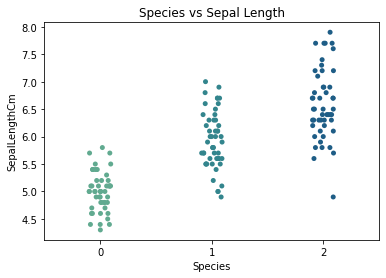

In [20]:
sns.stripplot(x='Species', y='SepalLengthCm', data=data, palette='crest')
plt.title('Species vs Sepal Length')

Text(0.5, 1.0, 'Species vs Sepal Width')

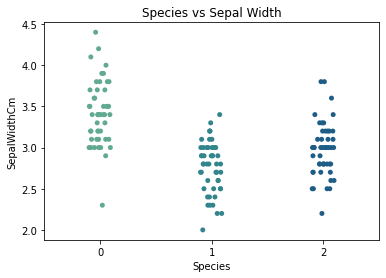

In [21]:
sns.stripplot(x='Species', y='SepalWidthCm', data=data, palette='crest')
plt.title('Species vs Sepal Width')

Text(0.5, 1.0, 'Species vs Petal Length')

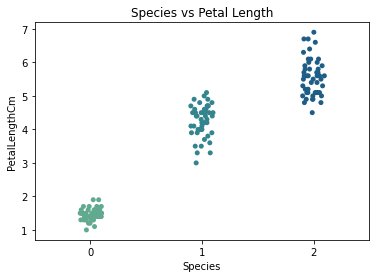

In [22]:
sns.stripplot(x='Species', y='PetalLengthCm', data=data, palette='crest')
plt.title('Species vs Petal Length')

Text(0.5, 1.0, 'Species vs Petal Width')

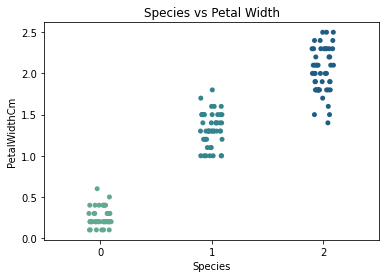

In [23]:
sns.stripplot(x='Species', y='PetalWidthCm', data=data, palette='crest')
plt.title('Species vs Petal Width')

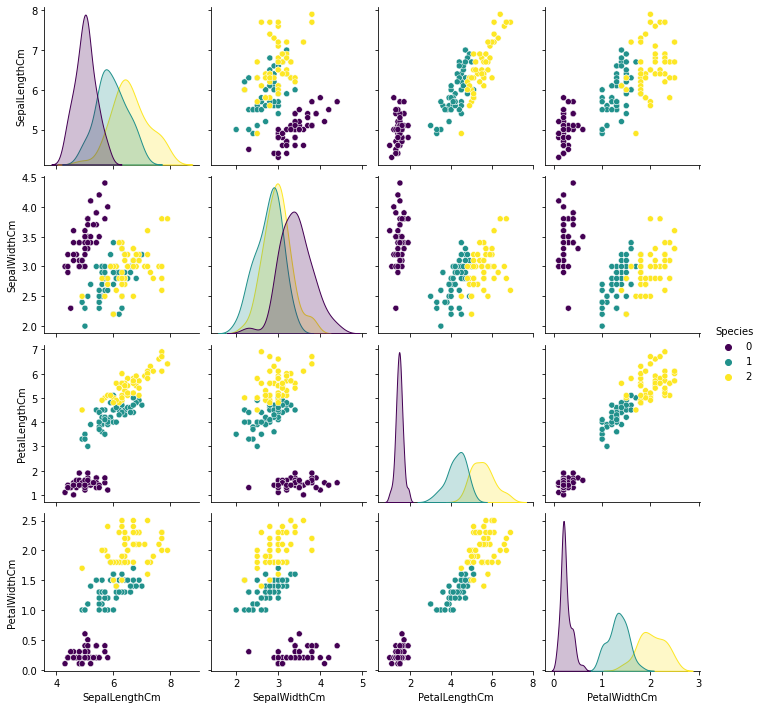

In [25]:
sns.pairplot(data, hue = 'Species',palette='viridis')
plt.show()

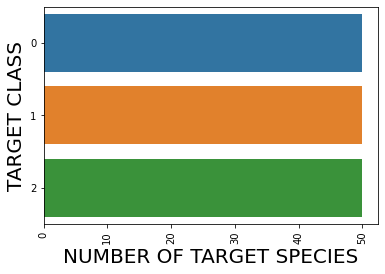

In [26]:
sns.countplot(y=data['Species'],data=data)
plt.xticks(rotation = 90)
plt.ylabel('TARGET CLASS',fontsize=20)
plt.xlabel('NUMBER OF TARGET SPECIES',fontsize=20)
plt.show()

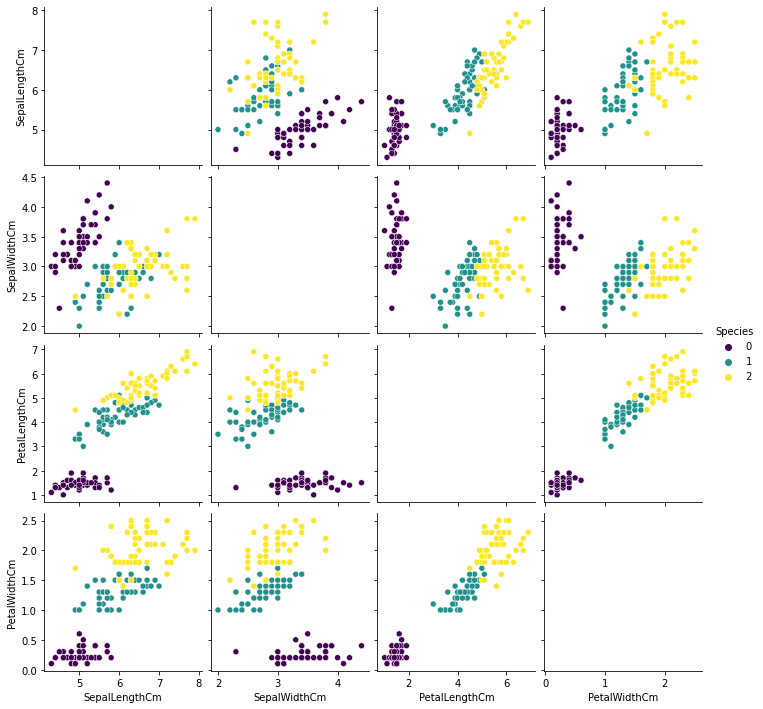

In [27]:
sns.pairplot(data, hue = 'Species', palette='viridis', diag_kind = 'reg')

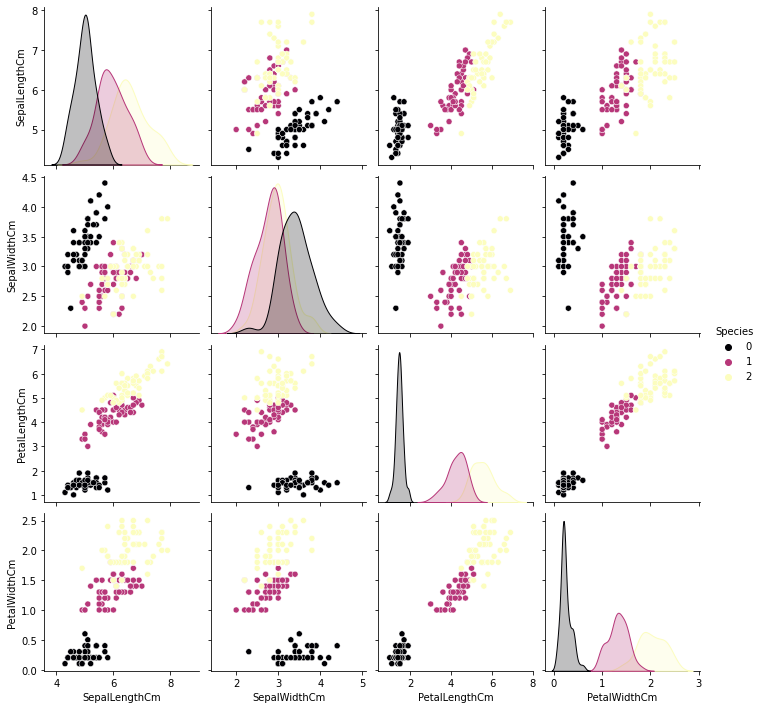

In [31]:
sns.pairplot(data, hue = 'Species', palette='magma', diag_kind = 'kde')

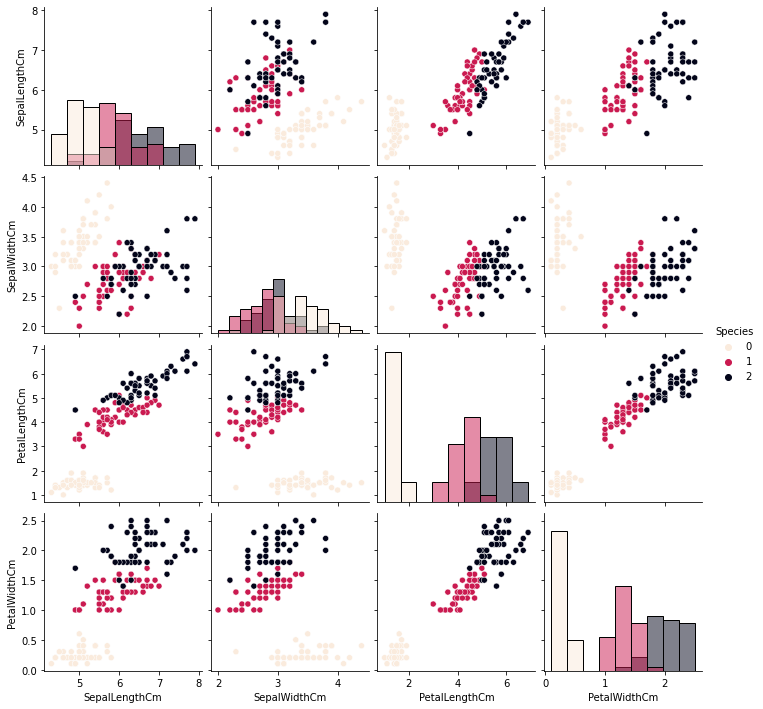

In [30]:
sns.pairplot(data, hue = 'Species', palette='rocket_r', diag_kind = 'hist')

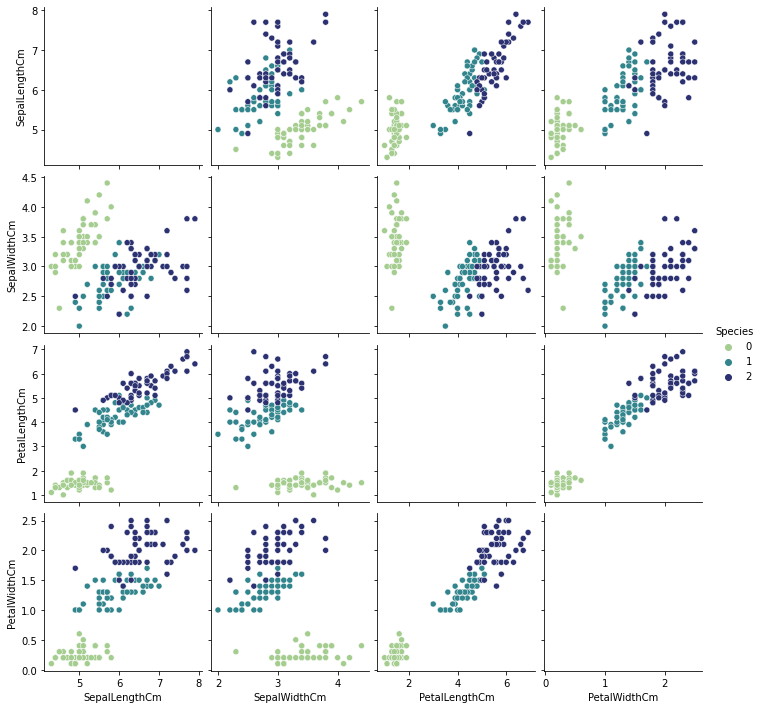

In [32]:
sns.pairplot(data, hue = 'Species', palette='crest', diag_kind = 'scatter')

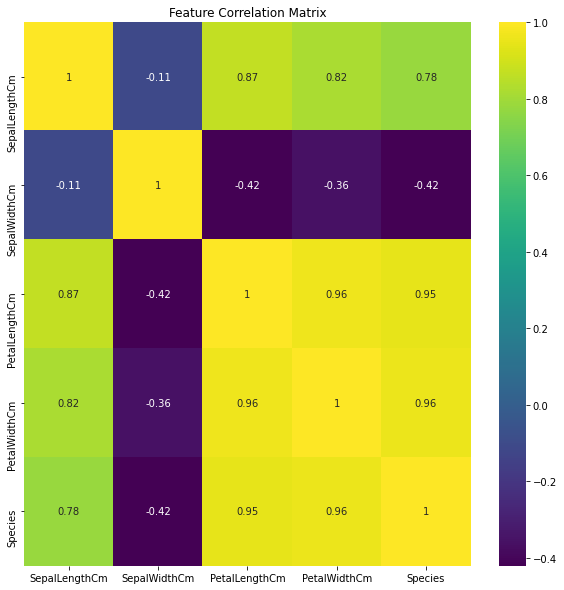

In [33]:
plt.figure(figsize=(10,10))
matrix = data.corr()
corMat = sns.heatmap(matrix, annot=True, cmap="viridis")
corMat.set_title("Feature Correlation Matrix")
plt.show()

6. MODEL BUILDING

In [39]:
x = data.drop(['Species'], axis =1)
y = data['Species']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [45]:
sc = DecisionTreeClassifier(criterion="entropy", random_state=20)

In [46]:
sc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

In [55]:
from sklearn import metrics
y_pred1 = sc.predict(x_test)
predicted1=y_pred1
actual=y_test
score_lr= accuracy_score(y_test,y_pred1)
print("Accuracy is:",score_lr)
print('Recall : {}'.format(metrics.recall_score(y_test, y_pred1, average='macro')))
print('Precision :{}'.format(metrics.precision_score(y_test, y_pred1, average='macro')))
results=confusion_matrix(actual,predicted1)
print('confusion matrix: \n',results)

Accuracy is: 0.9555555555555556
Recall : 0.9629629629629629
Precision :0.9487179487179488
confusion matrix: 
 [[16  0  0]
 [ 0 16  2]
 [ 0  0 11]]


In [54]:
print('Classification Report:')
print(metrics.classification_report(y_test, y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.89      0.94        18
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
feature_names = data.columns[:4]
target_names = data['Species'].unique().tolist()
arget_names=['0','1','2']
feature_names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

PLOTTING THE DECISION TREE

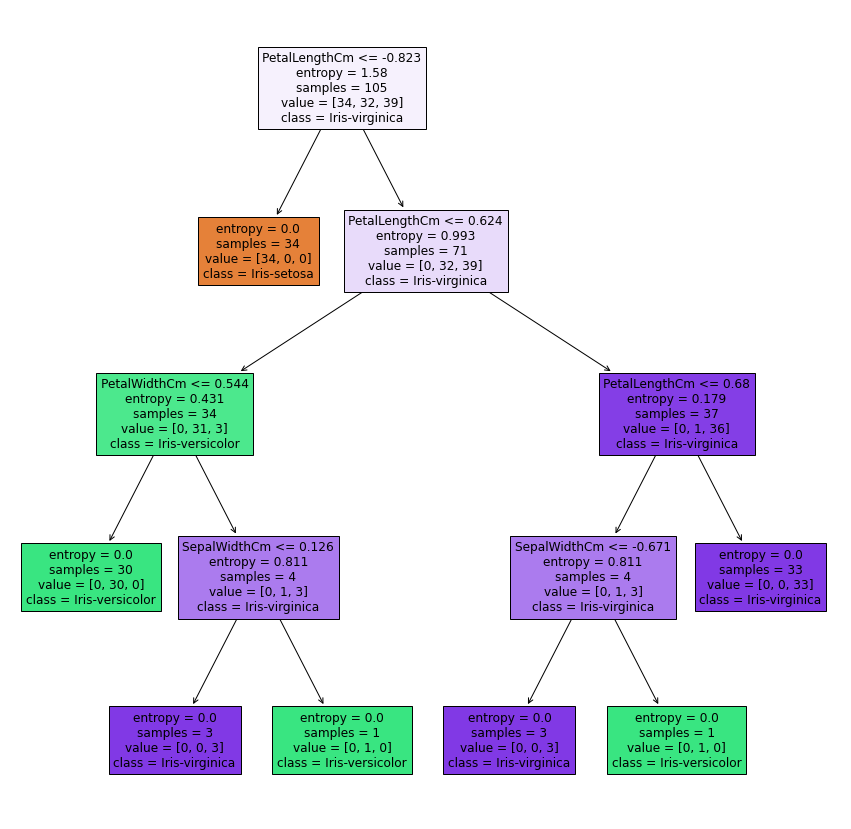

In [61]:
features = data.columns[:-1]
classes = data['Species'].unique().tolist()
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(sc, feature_names=features, class_names=classes, filled=True)
plt.show()
